In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

### Consumer price index for different areas

In [2]:
cpi = pd.read_csv('data/spotrebitelske_ceny.csv', encoding='utf-8') # consumer price index
cpi = cpi[['hodnota', 'mesic', 'rok', 'obdobiod', 'obdobido' ,'bazobdobiod', 'bazobdobido', 'ucel_txt', 'casz_txt']]
print(f'Before:\n{cpi.dtypes}\n')
# Convert obdobiod and obdobi do into date
cpi['obdobiod'] = pd.to_datetime(cpi['obdobiod'])
cpi['obdobido'] = pd.to_datetime(cpi['obdobido'])
cpi['bazobdobiod'] = pd.to_datetime(cpi['bazobdobiod'])
cpi['bazobdobido'] = pd.to_datetime(cpi['bazobdobido'])
# Convert ucet_txt to string dtype
cpi['ucel_txt'] = cpi['ucel_txt'].astype("string")
cpi['casz_txt'] = cpi['casz_txt'].astype("string")
print(f'After:\n{cpi.dtypes}')
# Lets see the categories we have
print(list(cpi['ucel_txt'].unique()))
# We can see that there are two types of encoding - utf8 and non-utf8, we need to merge them together
cpi['ucel_txt'] = cpi['ucel_txt'].str.replace('a\xa0', 'a ')
# We can also see NaN values in the data, which according to docs means overall cpi
cpi.fillna({'ucel_txt': 'total'}, inplace=True)
print(list(cpi['ucel_txt'].unique()))

Before:
hodnota        float64
mesic            int64
rok              int64
obdobiod        object
obdobido        object
bazobdobiod     object
bazobdobido     object
ucel_txt        object
casz_txt        object
dtype: object

After:
hodnota               float64
mesic                   int64
rok                     int64
obdobiod       datetime64[ns]
obdobido       datetime64[ns]
bazobdobiod    datetime64[ns]
bazobdobido    datetime64[ns]
ucel_txt       string[python]
casz_txt       string[python]
dtype: object
[<NA>, 'Potraviny a\xa0nealkoholické nápoje', 'Alkoholické nápoje, tabák a\xa0narkotika', 'Odívání a\xa0obuv', 'Bydlení, voda, energie, paliva', 'Bytové vybavení, zařízení domácnosti; opravy', 'Zdraví', 'Doprava', 'Komunikace', 'Rekreace a\xa0kultura', 'Vzdělávání', 'Stravování a\xa0ubytování', 'Ostatní výrobky a\xa0služby', 'Alkoholické nápoje, tabák a narkotika', 'Potraviny a nealkoholické nápoje', 'Rekreace a kultura', 'Pošty a telekomunikace', 'Ostatní zboží a služby', '

In [3]:
cpi.head(5)

,hodnota,mesic,rok,obdobiod,obdobido,bazobdobiod,bazobdobido,ucel_txt,casz_txt
0,105.2,5,2018,2018-05-01,2018-05-31,2015-01-01,2015-12-31,total,průměr bazického roku
1,106.0,5,2018,2018-05-01,2018-05-31,2015-01-01,2015-12-31,Potraviny a nealkoholické nápoje,průměr bazického roku
2,109.7,5,2018,2018-05-01,2018-05-31,2015-01-01,2015-12-31,"Alkoholické nápoje, tabák a narkotika",průměr bazického roku
3,102.9,5,2018,2018-05-01,2018-05-31,2015-01-01,2015-12-31,Odívání a obuv,průměr bazického roku
4,104.5,5,2018,2018-05-01,2018-05-31,2015-01-01,2015-12-31,"Bydlení, voda, energie, paliva",průměr bazického roku


In [8]:
cpi_yearly =  cpi[cpi['casz_txt'] == 'stejných 12 měsíců předchozího roku'].copy()
cpi_monthly = cpi[cpi['casz_txt'] == 'stejné období předchozího roku'].copy()

In [9]:
translation_dict = {
    'total' : 'total',
    'Potraviny a nealkoholické nápoje'  : 'Food and non-alcoholic beverages',
    'Alkoholické nápoje, tabák a narkotika' : 'Alcoholic beverages, tobacco and narcotics',
    'Odívání a obuv' : 'Clothing and footwear',
    'Bydlení, voda, energie, paliva' : 'Housing, water, energy, fuels',
    'Bytové vybavení, zařízení domácnosti; opravy' : 'Furniture, household maintenance; repairs',
    'Zdraví' : 'Health',
    'Doprava' : 'Transport',
    'Komunikace' : 'Communication',
    'Rekreace a kultura' : 'Recreation and culture',
    'Vzdělávání' : 'Education',
    'Stravování a ubytování' : 'Catering and accommodation',
    'Ostatní výrobky a služby' : 'Other products and services',
    'Pošty a telekomunikace' : 'Postal services and telecommunications',
    'Ostatní zboží a služby': 'Other goods and services',
}

In [10]:
# We want the categories to be in english
cpi_monthly['ucel_txt_eng'] = cpi_monthly['ucel_txt'].map(translation_dict)
cpi_yearly['ucel_txt_eng'] = cpi_yearly['ucel_txt'].map(translation_dict)

In [12]:
def plot_area(sectors, figname=None):
    fig, ax = plt.subplots(tight_layout=True)
    line_colors = ["#00BDB1", "#EE5383", "#D69653", "#00ABDF"]
    marker_colors = ["#039188", "#D14972", "#BD874A", "#0395C1"]
    marker_outer_colors = ["#026660", "#91334F", "#986D3C", "#017598"]
    min_hodnota = 100
    max_hodnota = 100
    for i, sector in enumerate(sectors):
        cpi_december = cpi_yearly[cpi_yearly['mesic'] == 12]
        data = cpi_december[cpi_december['ucel_txt_eng'] == sector].copy()
        data.sort_values(by=['rok', 'mesic'], inplace=True)
        ax.plot(data['rok'], data['hodnota']-100, marker='o', color=line_colors[i], mfc=marker_colors[i], mec=marker_outer_colors[i] )
        max_hodnota = max(max_hodnota, max(data['hodnota']))
        min_hodnota = min(min_hodnota, min(data['hodnota']))

    ax.tick_params(axis='x', labelrotation=45)
    #plt.legend(sectors)
    ax.set_xticks(data['rok'])

    #set y ticks from 0 every 2 steps:
    ax.set_yticks(np.arange(min_hodnota-100, max_hodnota-100, 2))
    ax.grid(True, axis='y', alpha=0.5, linestyle='--')
    if len(sectors) > 1:
        ax.legend(sectors)
    ax.set_xlabel('Year')
    ax.set_ylabel('Consumer price difference from previous year (%)')
    ax.set_title(f'Consumer price index development in Czech republic')

    if figname:
        plt.savefig(figname)

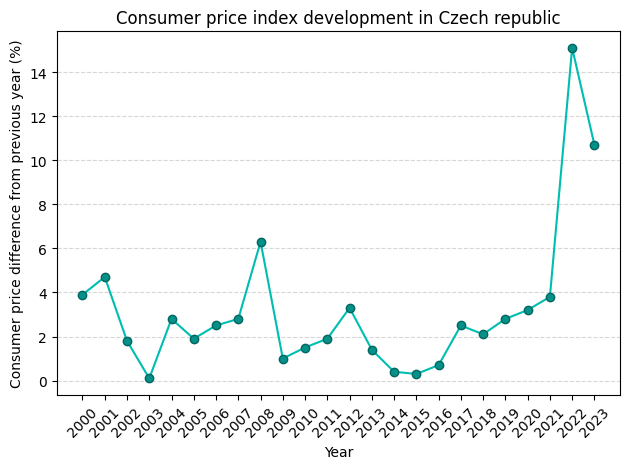

In [13]:
plot_area(['total'])

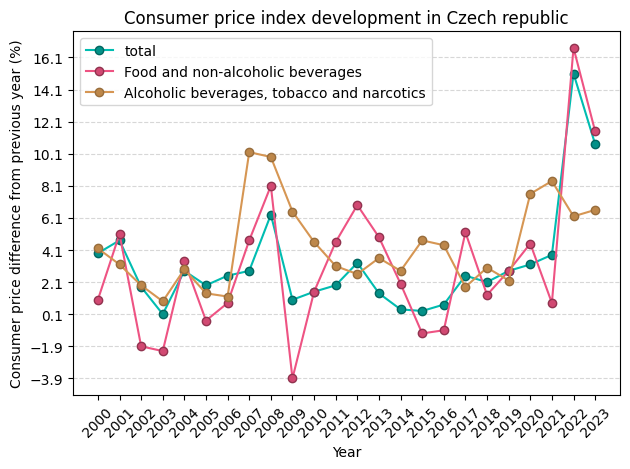

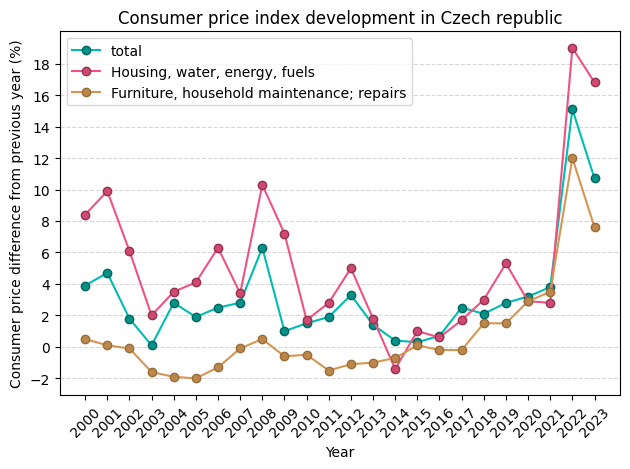

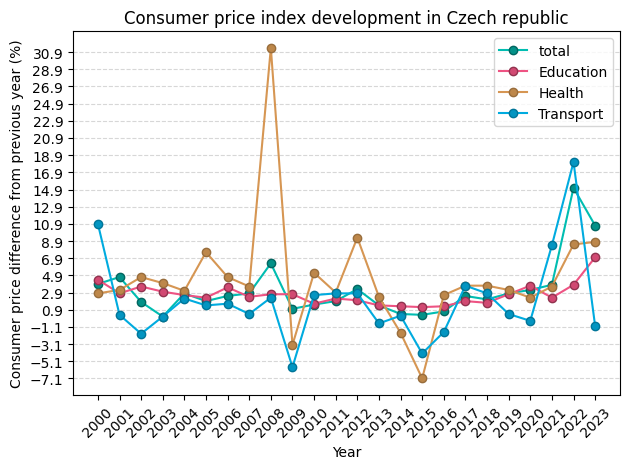

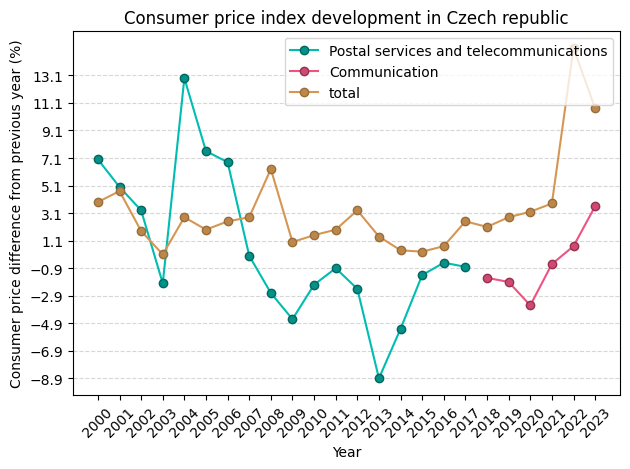

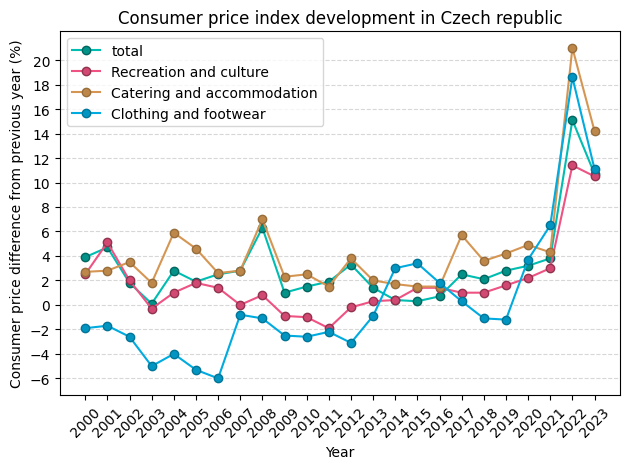

In [14]:
plot_area(['total', 'Food and non-alcoholic beverages', 'Alcoholic beverages, tobacco and narcotics' ])
plot_area(['total', 'Housing, water, energy, fuels', 'Furniture, household maintenance; repairs'])
plot_area(['total', 'Education', 'Health', 'Transport'])
plot_area([ 'Postal services and telecommunications', 'Communication', 'total'])
plot_area(['total', 'Recreation and culture', 'Catering and accommodation', 'Clothing and footwear'])

### Working with seasonal data

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [16]:
ri = pd.read_csv('data/doprava_maloobchod_sluzby.csv', encoding='utf-8') # load revenues

In [17]:
ri['cznace_txt'] = ri['cznace_txt'].str.replace('\xa0', ' ') # again merge utf-8 and non-utf8

In [18]:
def get_data(nace, casz, oceneni, ocisteni):
    data = ri[ri['cznace_txt'] == nace]
    data = data[data['casz_txt'] == casz]
    data = data[data['oceneni_txt'] == oceneni]
    data = data[data['ocisteni_txt'] == ocisteni]
    return data.copy()

In [19]:
air_transport = get_data('Letecká doprava', 'průměr bazického roku', 'běžné ceny', 'neočištěno')

In [26]:
def plot_line(dataset, figname = None, short_timeframe=False, legend = None):
    colors = ["#00BDB1", "#EE5383", "#D69653", "#00ABDF"]
    fig, ax = plt.subplots()
    dataset = dataset.copy()

    for i, data in enumerate(dataset):
        if short_timeframe:
            data = data[data['rok'] >=2016].copy() 
            data = data[data['rok'] <= 2021].copy()

        data.sort_values(['rok', 'mesic'], inplace=True)
        data['datum'] = data['mesic'].astype(str) + '/' + data['rok'].astype(str)

        ax.plot(data['datum'], data['hodnota'], color=colors[i])

    ax.tick_params(axis='x', labelrotation=45)
    # Generate custom x-tick positions for January and July
    ax.set_xticks([ '1/2016', '7/2016','1/2017', '7/2017','1/2018', '7/2018','1/2019', '7/2019', '1/2020', '7/2020', '1/2021', '7/2021'])
    ax.set_xticklabels([ '1/2016', '7/2016','1/2017', '7/2017','1/2018', '7/2018','1/2019', '7/2019', '1/2020', '7/2020', '1/2021', '7/2021'])

    ax.set_xlabel('Year')
    ax.set_ylabel('Revenue (% of base year(2021) average)')

    # Customize specific x-tick labels with different colors
    for tick_label in ax.get_xticklabels():
        if tick_label.get_text() in ['1/2021', '7/2021']:
            tick_label.set_color('#EE5383')
            
    ax.grid(True, alpha=0.5, linestyle='--')
    #title:
    ax.set_title('Air transport revenue in Czechia')
    if len(dataset) > 1 and legend is not None:
        ax.legend(legend)
    #save to svg
    plt.tight_layout()
    if figname:
        plt.savefig(figname)

[2018 2019 2020 2021 2016 2017]


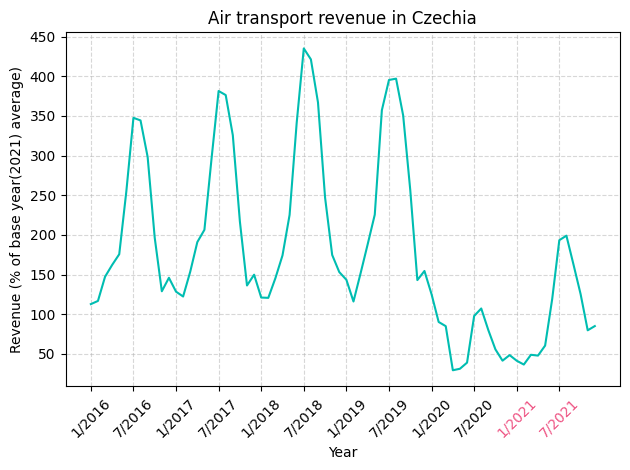

In [21]:
plot_line([air_transport], figname=None, short_timeframe=True)

In [22]:
def plot_decomposition(data):
    data['datum'] = data['mesic'].astype(str) + '/' + data['rok'].astype(str)
    #sort data:
    data = data.sort_values(['rok', 'mesic'])
    decomposition = seasonal_decompose(data['hodnota'], model='multiplicative', period=12)
    fig, ax = plt.subplots(4, 1, figsize=(10, 10))
    ax[0].plot(data['datum'], decomposition.observed, color="#EE5383")
    ax[0].set_title('Observed data')
    ax[0].set_ylim([0, 500])
    ax[1].plot(data['datum'], decomposition.trend, color="#EE5383")
    ax[1].set_title('Trend')
    ax[1].set_ylim([0, 500])
    ax[2].plot(data['datum'], decomposition.seasonal, color="#EE5383")
    ax[2].set_title('Seasonal')
    ax[2].set_ylim([0, 1.7])
    ax[3].plot(data['datum'], decomposition.resid, color="#EE5383")
    ax[3].set_title('Residual')
    ax[3].set_ylim([0, 1.7])

    for i in range(4):
        xticks = [f'1/{year}' for year in range(2000, 2025)]
        xtick_labels = [f'{year}' for year in range(2000, 2025)]
        ax[i].set_xticks(xticks)
        ax[i].set_xticklabels(xtick_labels)
        ax[i].tick_params(axis='x', labelrotation=45)
    
        for tick_label in ax[i].get_xticklabels():
            if tick_label.get_text() in ['2021']:
                tick_label.set_color('#EE5383')


    plt.tight_layout()

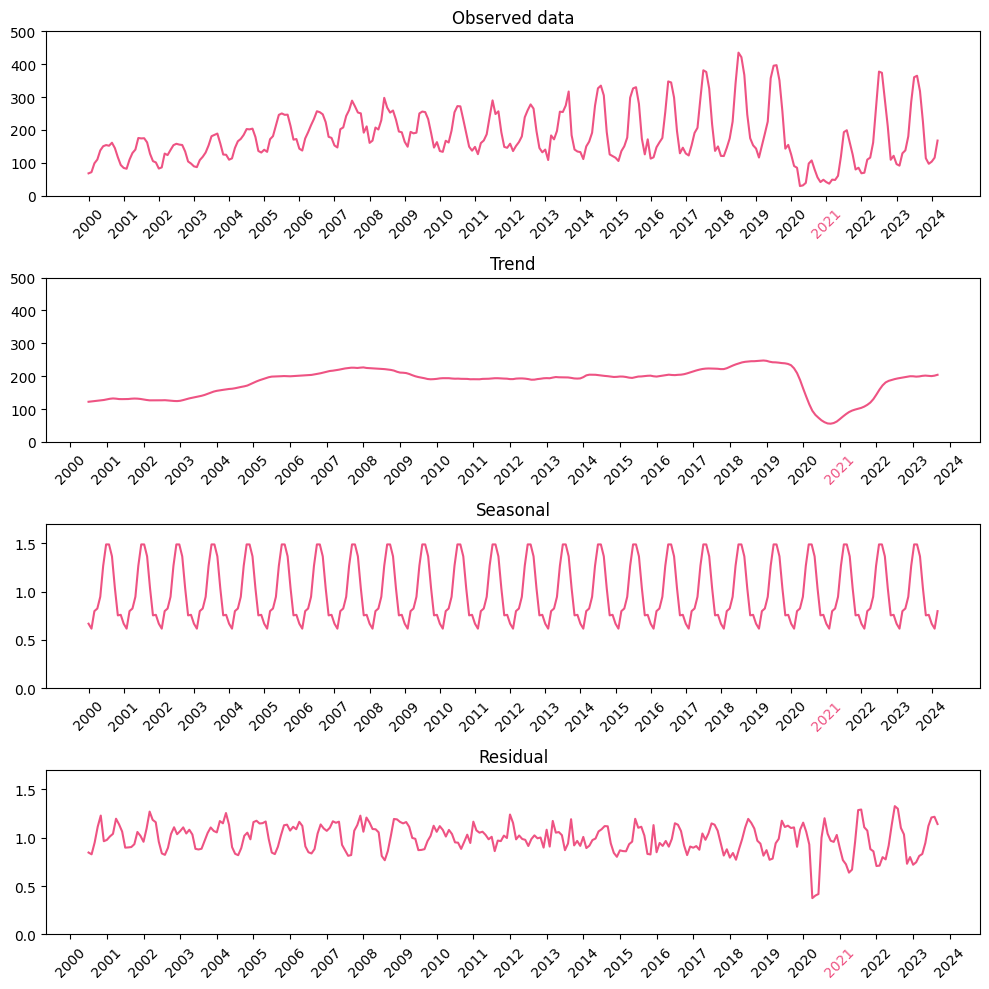

In [23]:
plot_decomposition(air_transport)

In [24]:
air_transport['datum'] = air_transport['mesic'].astype(str) + '/' + air_transport['rok'].astype(str)
air_transport = air_transport.sort_values(['rok', 'mesic'])
decomposition = seasonal_decompose(air_transport['hodnota'], model='multiplicative', period=12)
adjusted_vals = air_transport['hodnota'] / decomposition.seasonal
air_transport_adjusted = air_transport.copy()
air_transport_adjusted['hodnota'] = adjusted_vals

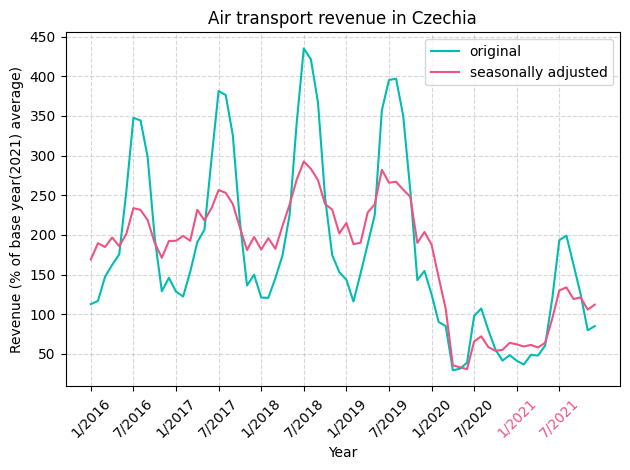

In [27]:
plot_line([air_transport, air_transport_adjusted], figname=None, short_timeframe=True, legend = ['original', 'seasonally adjusted'])

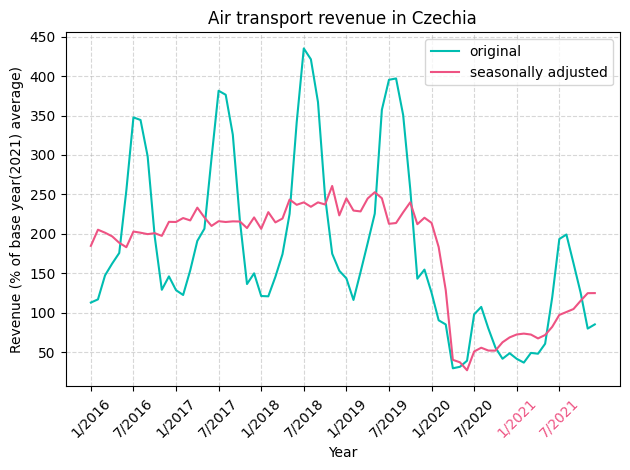

In [28]:
# Get the cleaned data from CSU for comparison
air_transport_cleaned = get_data('Letecká doprava', 'průměr bazického roku', 'běžné ceny', 'sezónně očištěno, včetně očištění o kalendářní vlivy')
plot_line([air_transport, air_transport_cleaned], figname=None, short_timeframe=True, legend = ['original', 'seasonally adjusted'])

### Revenues during COVID19

In [29]:
covid_profitability = ri[ri['oceneni_txt'] == 'běžné ceny'][['hodnota','mesic', 'rok', 'cznace_txt', 'casz_txt', 'ocisteni_txt']].copy()
covid_profitability = covid_profitability[covid_profitability['casz_txt'] == 'stejné období předchozího roku']
covid_profitability = covid_profitability[covid_profitability['ocisteni_txt'] == 'sezónně očištěno, včetně očištění o kalendářní vlivy']
covid_df = covid_profitability.loc[(covid_profitability['rok'] >= 2019) & (covid_profitability['rok'] <= 2021)].copy()
covid_df.sort_values(['rok', 'mesic'], inplace=True)

In [30]:
covid_df_2020 = covid_df[covid_df['rok'] == 2020][['hodnota', 'mesic', 'cznace_txt']].copy()
covid_df_2019 = covid_df[covid_df['rok'] == 2019][['hodnota', 'mesic', 'cznace_txt']].copy()

In [36]:
average_2020 = covid_df_2020.groupby('cznace_txt')['hodnota'].mean().reset_index()
average_2020.sort_values('hodnota', ascending=False, inplace=True)
average_2020['hodnota'] = average_2020['hodnota'] - 100 # change to percentage


average_2019 = covid_df_2019.groupby('cznace_txt')['hodnota'].mean().reset_index()
average_2019.sort_values('hodnota', ascending=False, inplace=True)
average_2019['hodnota'] = average_2019['hodnota'] - 100

In [32]:
translation_eng = {
    'Maloobchod mimo prodejny, stánky a trhy': 'Retail trade, except of shops, stalls and markets',
    'Poštovní a kurýrní činnosti': 'Postal and courier activities',
    'Informační činnosti': 'Information services',
    'Maloobchod s převahou potravin, nápojů a tabákových výrobků v nespecializovaných prodejnách': 'Retail sale in non-specialized stores\n with food, beverages or tobacco predominating',
    'Obchod, opravy a údržba motocyklů, jejich dílů a příslušenství' : 'Sale, maintenance and repair of motorcycles \nand their parts and accessories',
    'Vodní doprava' : 'Water transport',
    'Ubytování, stravování a pohostinství' : 'Accommodation and food service activities',
    'Ubytování' : 'Accommodation',
    'Letecká doprava': 'Air transport',
    'Činnosti cestovních agentur, kanceláří a jiné rezervační a související činnosti' : 'Travel agency, tour operator and other \nreservation service and related activities',
}

In [37]:
average_2020['engnace_txt'] = average_2020['cznace_txt'].map(translation_eng)
average_2019['engnace_txt'] = average_2019['cznace_txt'].map(translation_eng)

In [38]:
top_5 = average_2020.head(5).copy()
worst_5 = average_2020.tail(5).copy()
top_5_2019 = top_5.join(average_2019.set_index('cznace_txt'), on='cznace_txt', rsuffix='_2019')
worst_5_2019 = worst_5.join(average_2019.set_index('cznace_txt'), on='cznace_txt', rsuffix='_2019')

Text(0.5, 1.0, 'Difference in revenue in 2020 compared to 2019')

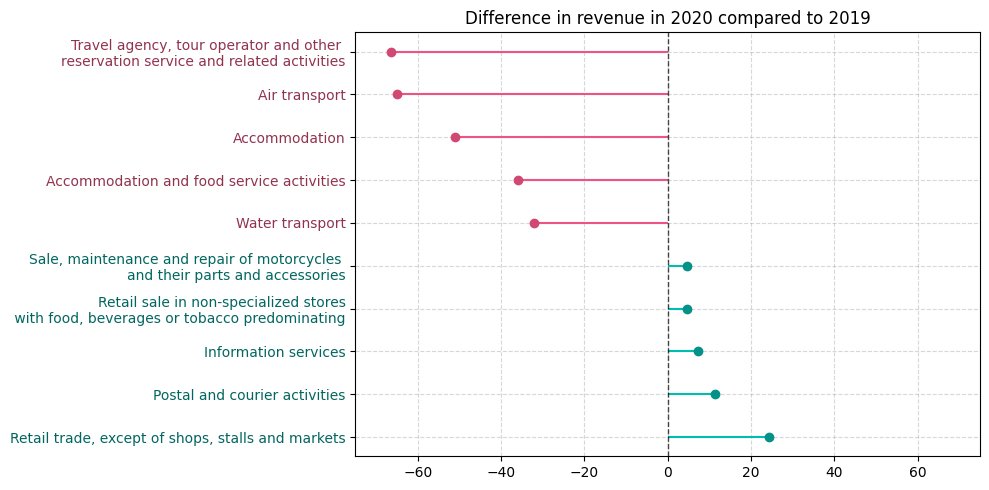

In [35]:
my_range=range(1,10+1)
#concat top5 and worst5 texts:
all = pd.concat([top_5, worst_5])

fig, ax = plt.subplots(1, 1, figsize=(10, 5), tight_layout=True)

ax.hlines(y=range(1,6), xmin=0, xmax=top_5['hodnota'], color="#00BDB1")
ax.hlines(y=range(6,11), xmin=0, xmax=worst_5['hodnota'], color="#EE5383")

ax.plot(top_5['hodnota'], range(1,6), "o", color="#039188")
ax.plot(worst_5['hodnota'], range(6,11), "o", color="#D14972")
ax.set_xlim(-75, 75)
ax.axvline(x = 0, color = 'black', linewidth = 1, linestyle = '--', alpha = 0.7)

ax.set_yticks(range(1,6), top_5['engnace_txt'], color='#026660')
ax.set_yticks(range(6,11), worst_5['engnace_txt'], color='#91334F')

ax.set_yticks(my_range)
ax.set_yticklabels(all['engnace_txt'])

# Modify properties of individual y-tick labels
for i, label in enumerate(ax.get_yticklabels()):
    if i < 5:  # First 5 ticks (top 5)
        label.set_color('#026660')
    else:  # Last 5 ticks (worst 5)
        label.set_color('#91334F')

ax.grid(True, alpha=0.5, linestyle='--')
plt.title('Difference in revenue in 2020 compared to 2019')

Text(0.5, 1.0, 'Difference in revenue from previous year')

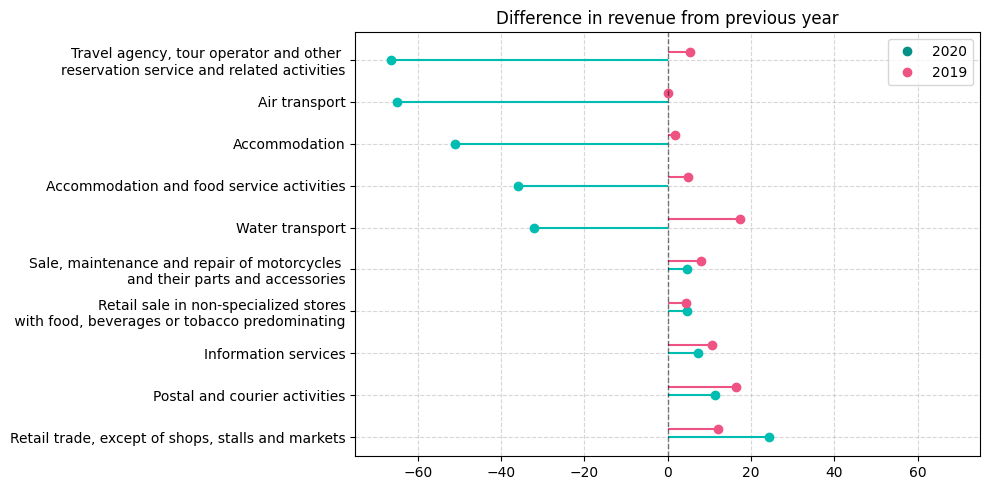

In [39]:
my_range=range(1,10+1)
#concat top5 and worst5 texts:
all = pd.concat([top_5, worst_5])

fig, ax = plt.subplots(1, 1, figsize=(10, 5), tight_layout=True)

ax.hlines(y=range(1,6), xmin=0, xmax=top_5_2019['hodnota'], color="#00BDB1")
range_vals_1 = [1.2, 2.2, 3.2, 4.2, 5.2]
ax.hlines(y=range_vals_1, xmin=0, xmax=top_5_2019['hodnota_2019'], color="#EE5383")

ax.hlines(y=range(6,11), xmin=0, xmax=worst_5_2019['hodnota'], color="#00BDB1")
range_vals_2 = [6.2, 7.2, 8.2, 9.2, 10.2]
ax.hlines(y=range_vals_2, xmin=0, xmax=worst_5_2019['hodnota_2019'], color="#EE5383")


ax.plot(top_5_2019['hodnota'], range(1,6), "o", color="#00BDB1")
ax.plot(top_5_2019['hodnota_2019'], range_vals_1, "o", color="#EE5383")

ax.plot(worst_5_2019['hodnota'], range(6,11), "o", color="#00BDB1")
ax.plot(worst_5_2019['hodnota_2019'], range_vals_2, "o", color="#EE5383")

ax.set_xlim(-75, 75)
ax.axvline(x = 0, color = 'black', linewidth = 1, linestyle = '--', alpha = 0.5)

ax.set_yticks(range(1,6), top_5['engnace_txt'], color='#026660')
ax.set_yticks(range(6,11), worst_5['engnace_txt'], color='#91334F')

ax.set_yticks(my_range)
ax.set_yticklabels(all['engnace_txt'], color='black')


#add legend:
ax.plot([], [], 'o', color="#039188", label='2020')
ax.plot([], [], 'o', color="#EE5383", label='2019')
ax.legend()


#fig.tight_layout()
ax.grid(True, alpha=0.5, linestyle='--')
plt.title('Difference in revenue from previous year')


### Construction during COVID19

In [41]:
copi_monthly = (
    pd.read_csv('data/stavby.csv', encoding='utf-8')
    .loc[:, ['hodnota', 'mesic', 'rok', 'mesicz', 'rokz', 'casz_txt', 'stavprace_txt', 'oceneni_txt', 'ocisteni_txt']]
    .query("stavprace_txt == 'Stavební práce celkem' and oceneni_txt == 'běžné ceny' and casz_txt == 'stejné období předchozího roku'")
)

In [42]:
def heatmap_monthly(sector, color):
    if color == 'blue':
        central_color = "#026660"
    elif color == 'pink':
        central_color = "#91334F"
    colors = [(1, 1, 1), central_color]  # from white to the central color
    n_bins = 100 
    cmap_name = 'custom_cmap'
    cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

    data_sector = copi_monthly[copi_monthly['stavprace_txt'] == sector].sort_values(['rok', 'mesic'])
    pivot = data_sector.pivot(index='rok', columns='mesic', values='hodnota')
    
    plt.figure(figsize=(10, 5), tight_layout=True)  
    ax = sns.heatmap(pivot, cmap=cm, annot=True, fmt=".1f")
    plt.title('Construction Production Index - Difference from the same month previous year')
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    ax.tick_params(axis='y', labelrotation=0)
    plt.xlabel('Month')
    plt.ylabel('Year')
    plt.show()

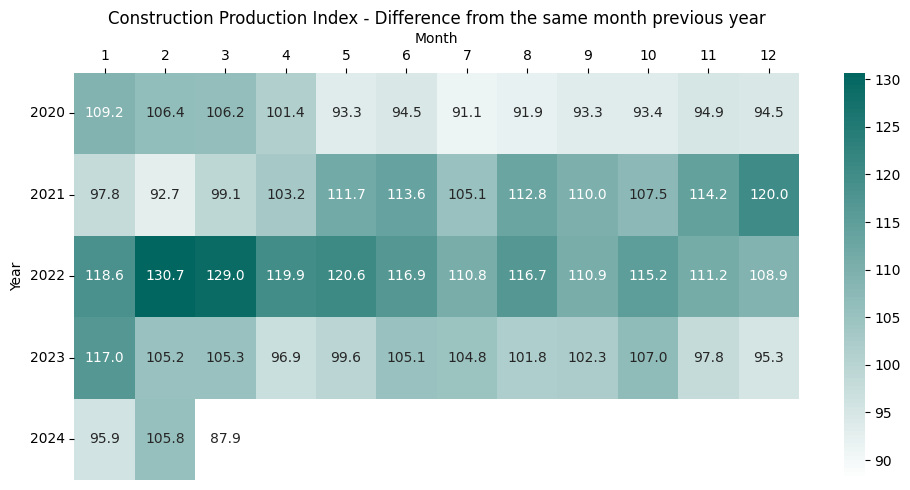

In [43]:
heatmap_monthly('Stavební práce celkem', 'blue')

### Industry during COVID19

In [59]:
ipi = pd.read_csv('data/prumysl.csv', encoding='utf-8').loc[:, ['hodnota', 'mesic', 'rok', 'mesicz', 'rokz' , 'cznace_txt', 'casz_txt']] # industrial production index

# Convert ucet_txt to string dtype
ipi['cznace_txt'] = ipi['cznace_txt'].astype("string")
ipi['casz_txt'] = ipi['casz_txt'].astype("string")

ipi['cznace_txt'] = ipi['cznace_txt'].str.replace('a\xa0', 'a ')

In [60]:
ipi_monthly = ipi[ipi['casz_txt'] == 'stejné období předchozího roku'].copy()

In [61]:
ipi_monthly = ipi_monthly[ipi_monthly['rok'] >= 2020]

In [66]:
def heatmap_monthly(sector, color, figname=None):
    if color == 'blue':
        central_color = "#026660"
    elif color == 'pink':
        central_color = "#91334F"
    colors = [(1, 1, 1), central_color]  # from white to the central color
    n_bins = 100 
    cmap_name = 'custom_cmap'
    cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

    data_sector = ipi_monthly[ipi_monthly['cznace_txt'] == sector].sort_values(['rok', 'mesic'])
    pivot = data_sector.pivot(index='rok', columns='mesic', values='hodnota')
    
    plt.figure(figsize=(10, 1.5), tight_layout=True)  
    ax = sns.heatmap(pivot, cmap=cm, annot=True, fmt=".1f")
    #plt.title('Industry Production Index - Difference from the same month previous year')
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    ax.tick_params(axis='y', labelrotation=0)
    plt.xlabel('Month')
    plt.ylabel('Year')
    if figname:
        plt.savefig(figname)

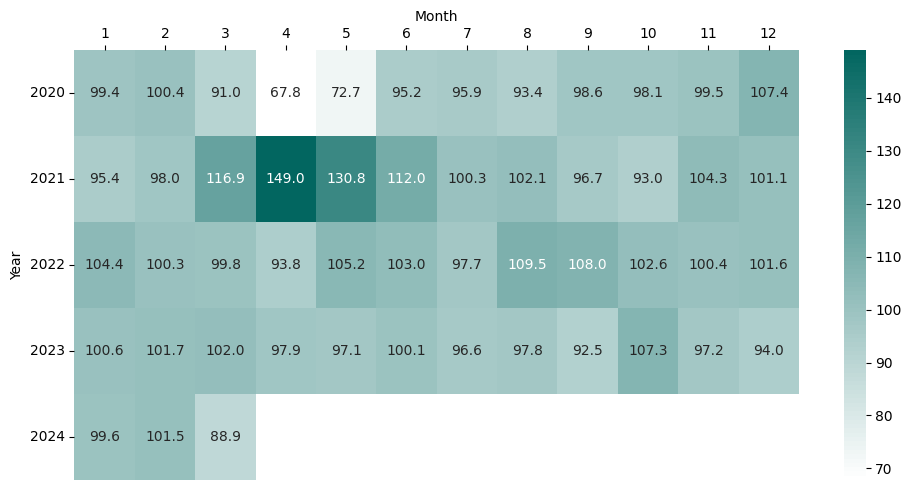

In [65]:
heatmap_monthly('Průmysl celkem (B+C+D)', 'blue')

In [67]:
ipi_monthly = ipi_monthly[ipi_monthly['rok'] <= 2020]

In [76]:
ipi_monthly.groupby('cznace_txt')['hodnota'].mean().reset_index().sort_values('hodnota', ascending=True).head(5)

,cznace_txt,hodnota
7,Těžba a úprava černého a hnědého uhlí,72.233333
24,Výroba strojů a zařízení j. n.,87.800000
27,Výroba usní a souvisejících výrobků,88.775000
14,"Výroba motorových vozidel (kromě motocyklů), p...",89.575000
16,Výroba nápojů,90.725000


##### Coal mining

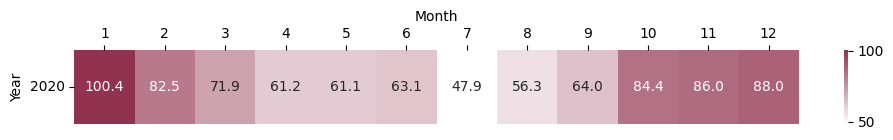

In [71]:
heatmap_monthly('Těžba a úprava černého a hnědého uhlí', 'pink')

##### Machine manufacturing

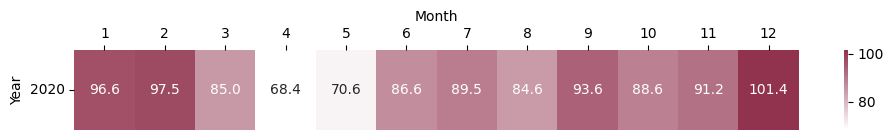

In [75]:
heatmap_monthly('Výroba strojů a zařízení j. n.', 'pink')

##### Leather manufacturing

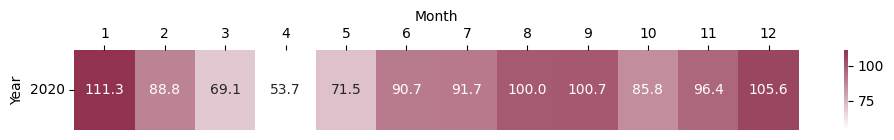

In [74]:
heatmap_monthly('Výroba usní a souvisejících výrobků', 'pink')

##### Car manufacturing

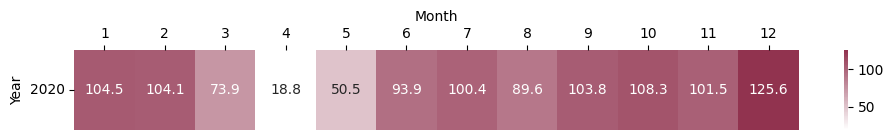

In [68]:
heatmap_monthly('Výroba motorových vozidel (kromě motocyklů), přívěsů a návěsů', 'pink')

##### Beverage manufacturing

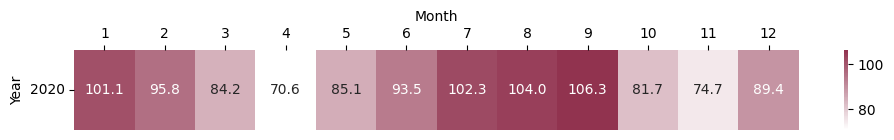

In [69]:
heatmap_monthly('Výroba nápojů', 'pink')